In [48]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [49]:
df=pd.read_csv("/content/dataframe_.csv")

In [50]:
df.shape

(1697, 2)

In [3]:
df.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [72]:
df.isna().sum()

input     1
output    1
dtype: int64

In [73]:
df.dropna(inplace=True)

In [5]:
df.describe()

,input,output
count,1696.000000,1696.000000
mean,1.159933,-34.088017
std,79.005970,65.771112
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


In [75]:
df.shape

(1696, 2)

In [74]:
print("Pring unique values of each column")
for i in df.columns[:]:
  print("*"*70)
  print("number of unique values of ",i," column :",df[i].nunique())
  print("unique values:")
  print(df[i].unique())

Pring unique values of each column
**********************************************************************
number of unique values of  input  column : 991
unique values:
[-1.22740667e+02 -1.21531419e+02 -1.34917019e+02 -1.20605951e+02
 -1.29894781e+02 -1.34366669e+02 -1.15563739e+02 -1.32080161e+02
 -1.33366669e+02 -1.19524112e+02 -1.25743622e+02 -1.14100895e+02
 -1.31366669e+02 -1.13278338e+02 -1.33818175e+02 -1.21653543e+02
 -1.27366669e+02 -1.08499640e+02 -1.11253677e+02 -1.24366669e+02
 -1.19116602e+02 -1.14410526e+02 -1.22366669e+02 -1.31905360e+02
 -1.09278368e+02 -1.05504640e+02 -1.12257907e+02 -1.11044048e+02
 -1.26637640e+02 -1.20366669e+02 -1.25085620e+02 -1.03409788e+02
 -1.15262637e+02 -1.19366669e+02 -1.04906529e+02 -9.97125535e+01
 -1.17366669e+02 -1.16332839e+02 -1.25382159e+02 -1.03219985e+02
 -1.15366669e+02 -1.20275093e+02 -1.13257481e+02 -9.66983513e+01
 -1.01997441e+02 -1.11902602e+02 -1.30789929e+02 -1.12366669e+02
 -9.89477182e+01 -1.04681987e+02 -1.12866909e+02 -1

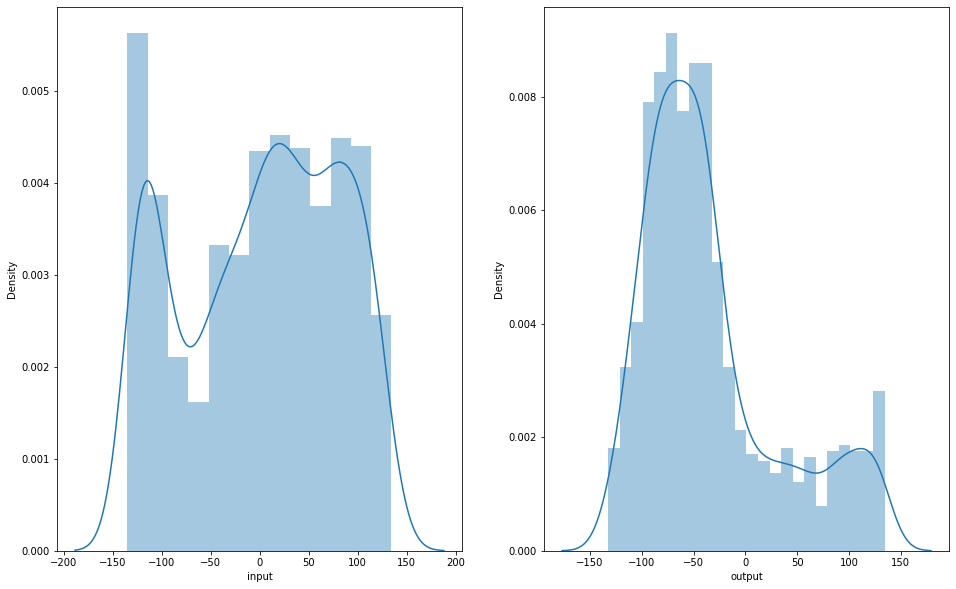

In [51]:
plt.figure(figsize=(16,10))
plt.subplot(1,2,1)
sns.distplot(df['input'])

plt.subplot(1,2,2)
sns.distplot(df['output'])

plt.show()

In [76]:
df["input"].skew()

-0.20318515325323347

In [77]:
df["output"].skew()

1.0573226471779904

In [ ]:
#both data is not normally distributed

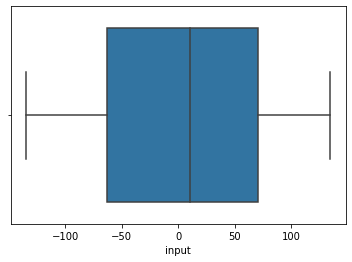

In [54]:
sns.boxplot(df["input"])

In [ ]:
#input column is not showing outliers

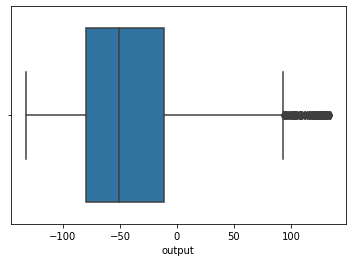

In [55]:
sns.boxplot(df["output"])

In [ ]:
#output data is showing outliers and from checking the statistical distribution of data maximum value(134.425495) is very much greater than its 75%(-11.000000)

In [ ]:
#so we will do outlier removal of output data using IQR method since data is not normally distributed

In [78]:
percentile_25=df['output'].quantile(0.25)
percentile_75=df['output'].quantile(0.75)

In [79]:
percentile_25

-80.02676665

In [80]:
percentile_75

-11.0

In [81]:
IQR=percentile_75-percentile_25
IQR

69.02676665

In [82]:
upper_limit=percentile_75 + 1.5*IQR
upper_limit

92.54014997499999

In [83]:
lower_limit=percentile_25 - 1.5*IQR
lower_limit

-183.56691662499998

In [ ]:
#finding outliers

In [62]:
df[df['output']>upper_limit]

,input,output
339,114.231059,100.493107
341,94.668251,103.818413
342,114.633331,94.000000
343,103.616817,109.965262
345,131.909580,94.636289
...,...,...
1470,133.101515,133.793116
1471,124.633331,129.000000
1472,121.060076,126.750385
1473,133.024034,132.055270


In [ ]:
#there are 144 rows which values greater than upper limit

In [63]:
df[df['output']<lower_limit]

,input,output


In [ ]:
#no rows where value less than lower limit

In [ ]:
#trimmimg

In [84]:
new_df=df[df['output']<upper_limit]

In [85]:
new_df.shape

(1552, 2)

In [ ]:
#originally the shapeof dataset was (1697, 2) which got reduced to (1552, 2) after outlier removal

In [ ]:
#comparing the data sets

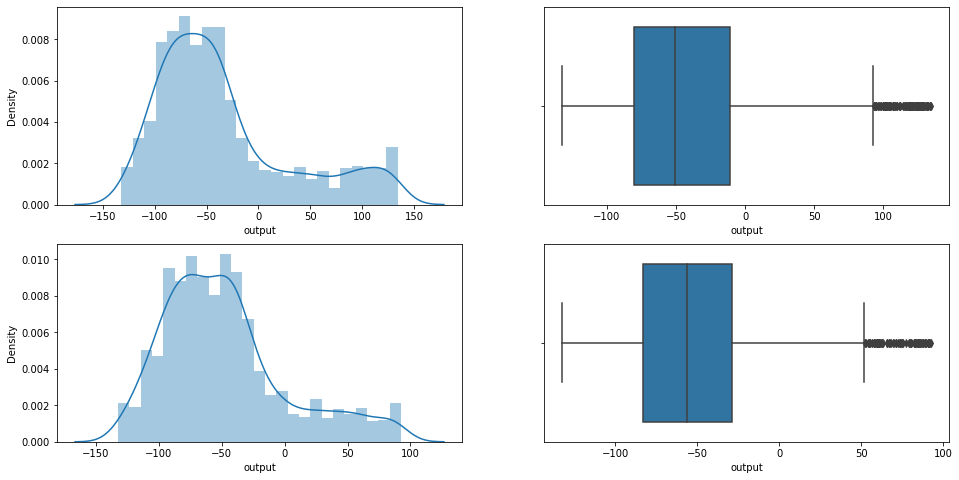

In [86]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['output'])

plt.subplot(2,2,2)
sns.boxplot(df['output'])

plt.subplot(2,2,3)
sns.distplot(new_df["output"])

plt.subplot(2,2,4)
sns.boxplot(new_df['output'])



plt.show()

In [ ]:
#even after performming trimming all the ouliers is not removed .So applying capping method to the dataset

In [87]:
#capping

new_df_cap=df.copy()

new_df_cap['output']=np.where(
    new_df_cap['output'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap["output"] < lower_limit,
        lower_limit,
        new_df_cap["output"]

        
    )
     
)

In [88]:
new_df_cap.shape

(1696, 2)

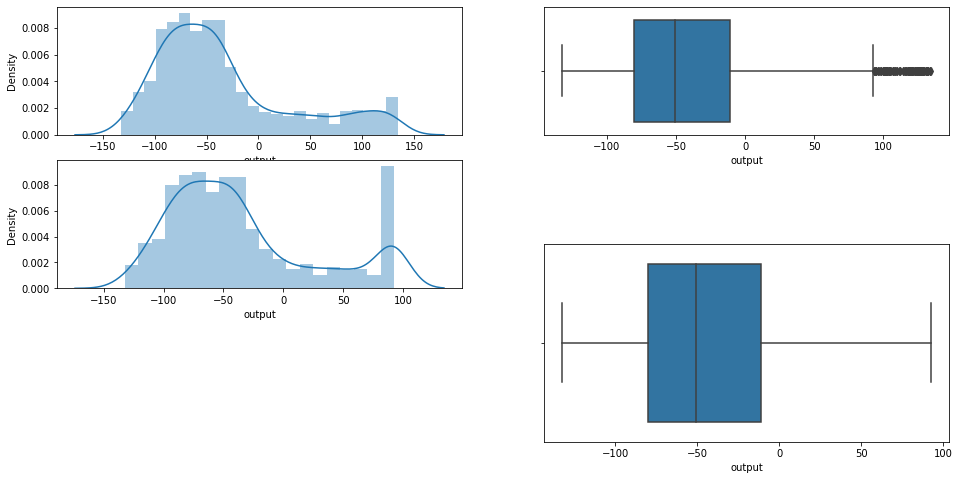

In [89]:
plt.figure(figsize=(16,8))
plt.subplot(3,2,1)
sns.distplot(df['output'])

plt.subplot(3,2,2)
sns.boxplot(df['output'])

plt.subplot(3,2,3)
sns.distplot(new_df_cap["output"])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['output'])



plt.show()

In [92]:
x=new_df_cap.iloc[:,:-1].values
y=new_df_cap.iloc[:,-1]

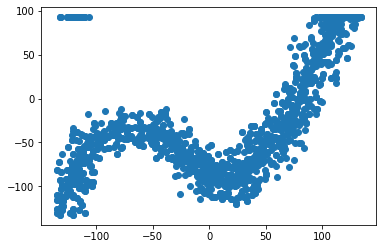

In [93]:
plt.scatter(x,y)

In [102]:
print(x.shape)
print(y.shape)

(1696, 1)
(1696,)


In [104]:
#splitting our data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)

In [105]:
#fitting the simple linear regression model to your training dataset
from sklearn import linear_model
lm = linear_model.LinearRegression()
#from sklearn.linear_model import LinearRegression
model = lm.fit(x_train,y_train)

In [106]:
model.coef_ #(#m, slope)

array([0.4149952])

In [107]:
model.intercept_  #(#c, intercept)

-36.338642408941475

In [108]:
#predict for test and training result
test_pred = model.predict(x_test)
train_pred = model.predict(x_train)

In [109]:
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

0.2854691821311367
0.30036277060530026


In [110]:
model.predict([[-122.740667]])

array([-87.27543038])